<a href="https://colab.research.google.com/github/SDASPb/HomeWorkSBp/blob/Lession%E2%84%964/Lession%E2%84%964.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.linear_model import LinearRegression

In [3]:
file = "/content/HousingPrices-Amsterdam-August-2021.csv"
df = pd.read_csv(file) #Читка файла
df.head(10) #вывод первых 10 строк
     

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
5,6,"De Wittenkade 134 I, Amsterdam",1051 AM,450000.0,53,2,4.875024,52.382228
6,7,"Pruimenstraat 18 B, Amsterdam",1033 KM,450000.0,87,3,4.896536,52.410585
7,8,"Da Costakade 32 II, Amsterdam",1053 WL,590000.0,80,2,4.871555,52.371041
8,9,"Postjeskade 41 2, Amsterdam",1058 DG,399000.0,49,3,4.854671,52.363471
9,10,"Van Ostadestraat 193 H, Amsterdam",1073 TM,300000.0,33,2,4.897142,52.353111


In [19]:
df.fillna(df.mean(), inplace=True) #Заполняет NaN ячейки средним значением 
x = df["Area"].values.reshape(-1, 1) # ось x полощадь и размерность массива 
y = df["Price"].values.reshape(-1, 1)
model = LinearRegression() #Создает объект модели линейной регрессии при помощи класса 
model.fit(x, y) #Обучает модель методом fit по площади и цене, для предсказание цены за площадь
     

<ipython-input-19-14734f3499cc>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True) #Заполняет NaN ячейки средним значением


LinearRegression()

In [5]:
r_sq = model.score(x, y) # Вычислить коэффициент детерминации
r_sq #насколько хорошо линейная регрессионная модель подходит к данным

0.6799791607837686

In [6]:
model.intercept_ #также называемый коэффициентом сдвига или точкой пересечения при нулевой площади кв

array([-118688.3731834])

In [10]:
model.coef_ #это коэффициент (наклон) линейной регрессионной модели увеличение цены на 7720 за кв.м

array([[7720.01471351]])

In [8]:
y_pred = model.predict(x) # это массив предсказанных значений зависимой переменной по жилью и цен 
y_pred
     

array([[ 375392.56848119],
       [ 344512.50962715],
       [ 722793.2305891 ],
       [ 869473.51014577],
       [ 946673.65728086],
       [ 290472.40663259],
       [ 552952.9068919 ],
       [ 498912.80389733],
       [ 259592.34777855],
       [ 136072.1123624 ],
       [ 413992.64204873],
       [ 560672.92160541],
       [ 228712.28892451],
       [ 421712.65676224],
       [ 545232.89217839],
       [ 691913.17173506],
       [ 668753.12759453],
       [ 483472.77447031],
       [ 653313.09816752],
       [ 282752.39191908],
       [1417594.55480492],
       [ 429432.67147575],
       [ 761393.30415664],
       [ 460312.73032979],
       [ 730513.24530261],
       [ 568392.93631892],
       [ 915793.59842683],
       [ 275032.37720557],
       [1695515.08449125],
       [ 166952.17121644],
       [ 637873.0687405 ],
       [1873075.42290196],
       [ 522072.84803786],
       [2343996.32042602],
       [ 452592.71561628],
       [ 120632.08293538],
       [ 244152.31835153],
 

Text(0, 0.5, 'Цена в EUR')

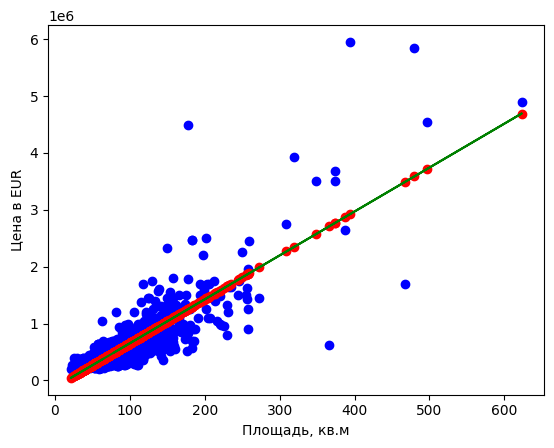

In [18]:
plt.scatter(x, y, color = 'b') #Исходные данные: цены/площади
plt.scatter(x, y_pred, color='r') #Предсказанные данные: цены/площади
plt.plot(x, y_pred, color='g') #Линия линейной регрессии, проходящая через точки данных.
plt.xlabel('Площадь, кв.м')
plt.ylabel('Цена в EUR')

In [14]:
x_new = np.arange(1200,1201).reshape((-1, 1)) # диапозон кв.м и преобраз. массива в двумерный 
y_new = model.predict(x_new) #содержит предсказанные значения цен на жилье для каждого знач. x.new
x_new, y_new

(array([[1200]]), array([[9145329.2830276]]))